In [6]:
%matplotlib notebook

In [7]:
#Import Dependencies 
import requests
from scipy import stats
import pandas as pd
from CovidAct_API_key import api_key
import matplotlib.pyplot as plt

In [8]:
url = "https://api.covidactnow.org/v2/state/WA.timeseries.json?apiKey="


In [9]:
response = requests.get(url + api_key).json()
response

{'fips': '53',
 'country': 'USA',
 'state': 'WA',
 'county': None,
 'level': 'state',
 'lat': None,
 'locationId': 'iso1:us#iso2:us-wa',
 'long': None,
 'population': 7614893,
 'metrics': {'testPositivityRatio': 0.03481120476395041,
  'testPositivityRatioDetails': {'source': 'other'},
  'caseDensity': 8.779787563284588,
  'contactTracerCapacityRatio': 0.6347863247863248,
  'infectionRate': 0.9149398281569999,
  'infectionRateCI90': 0.10000000000300002,
  'icuHeadroomRatio': 0.17693836978131214,
  'icuHeadroomDetails': {'currentIcuCovid': 89,
   'currentIcuCovidMethod': 'actual',
   'currentIcuNonCovid': 864,
   'currentIcuNonCovidMethod': 'actual'},
  'icuCapacityRatio': 0.6971470373079737,
  'vaccinationsInitiatedRatio': 0.17890507456900576,
  'vaccinationsCompletedRatio': 0.09980494801437131},
 'riskLevels': {'overall': 1,
  'testPositivityRatio': 1,
  'caseDensity': 1,
  'contactTracerCapacityRatio': 1,
  'infectionRate': 1,
  'icuHeadroomRatio': 0,
  'icuCapacityRatio': 0},
 'actua

In [10]:
#Pull dictionary out of total data set in order to parse through in a for loop
response = response.get('actualsTimeseries')


In [11]:
#Create lists to hold the data you want
case_count = []
date = []
death = []
total_death = []
total_cases = []

In [12]:
# use for loop to pull out the data
for actualsTimeseries in range(0, len(response)):
    case_count.append(response[actualsTimeseries]['newCases'])
    date.append(response[actualsTimeseries]['date'])
    death.append(response[actualsTimeseries]['newDeaths'])
    total_death.append(response[actualsTimeseries]['deaths'])
    total_cases.append(response[actualsTimeseries]['cases'])

In [13]:
#create data frame to hold pulled data

WA_dict = {
    'Date': date,
    'Case Count': case_count,   
    'Death Count': death,
}

WA_data = pd.DataFrame.from_dict(WA_dict)

WA_data.dropna()

,Date,Case Count,Death Count
7,2020-01-21,1.0,0.0
8,2020-01-22,0.0,0.0
9,2020-01-23,0.0,0.0
10,2020-01-24,0.0,0.0
11,2020-01-25,0.0,0.0
...,...,...,...
416,2021-03-05,703.0,6.0
417,2021-03-06,568.0,3.0
418,2021-03-07,90.0,1.0
419,2021-03-08,1094.0,21.0


In [14]:
#reset the index
WA_data.reset_index()

,index,Date,Case Count,Death Count
0,0,2020-01-14,NaN,NaN
1,1,2020-01-15,NaN,NaN
2,2,2020-01-16,NaN,NaN
3,3,2020-01-17,NaN,NaN
4,4,2020-01-18,NaN,NaN
...,...,...,...,...
417,417,2021-03-06,568.0,3.0
418,418,2021-03-07,90.0,1.0
419,419,2021-03-08,1094.0,21.0
420,420,2021-03-09,711.0,12.0


In [15]:
#scale down the data and get rid of rows with 'NaN' to make the plot read better

clean_df = WA_data[WA_data.index % 10 == 0]  # Selects every 3rd row starting from 0

clean_df = clean_df.dropna()

In [16]:
clean_df

,Date,Case Count,Death Count
10,2020-01-24,0.0,0.0
20,2020-02-03,0.0,0.0
30,2020-02-13,0.0,0.0
40,2020-02-23,0.0,0.0
50,2020-03-04,15.0,1.0
60,2020-03-14,98.0,3.0
70,2020-03-24,368.0,13.0
80,2020-04-03,381.0,21.0
90,2020-04-13,133.0,14.0
100,2020-04-23,375.0,21.0


<IPython.core.display.Javascript object>


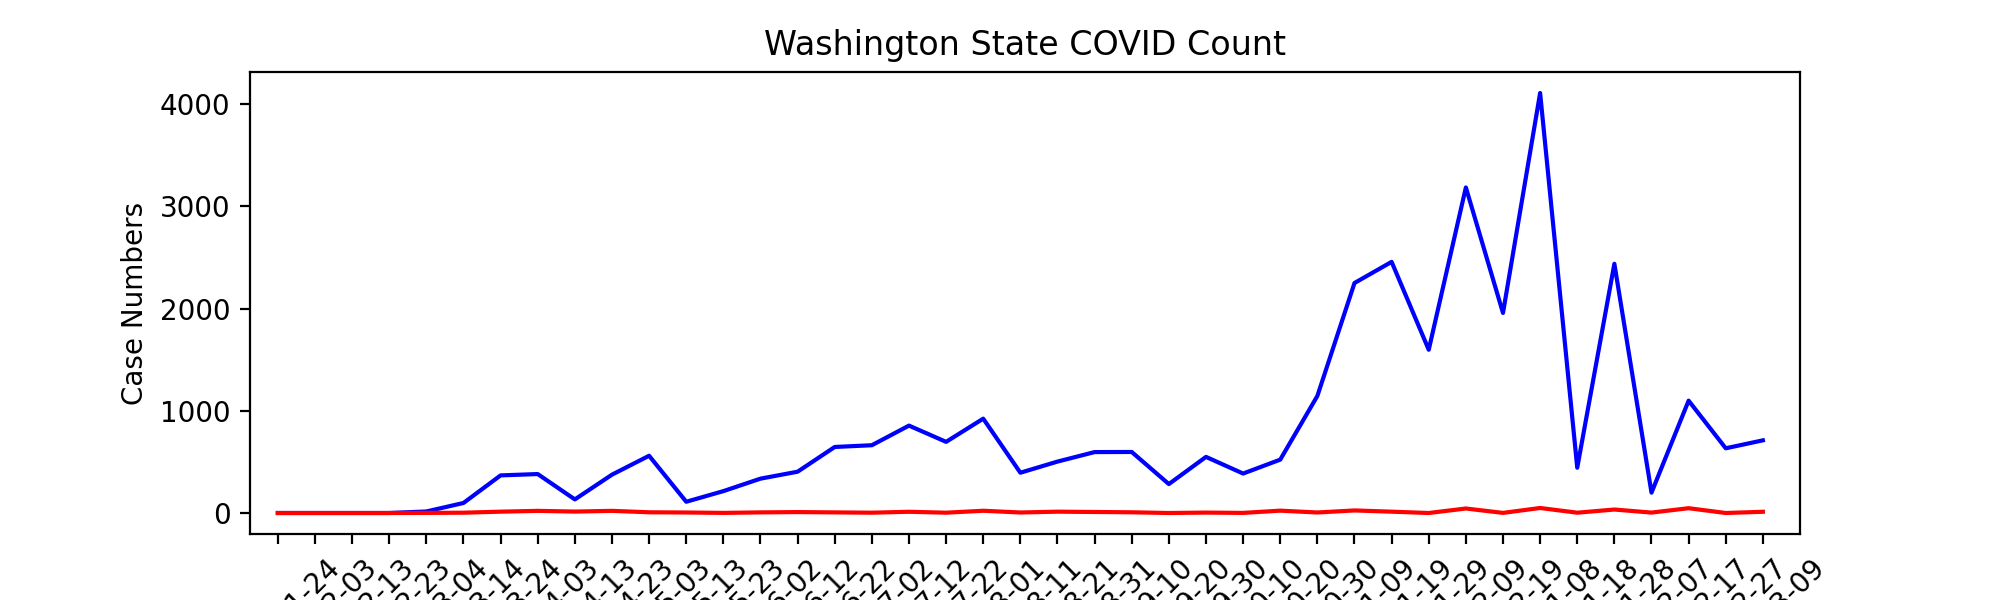

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [17]:
#Create line plot to showcase the data
plt.figure(figsize=(10, 3))
case_count = plt.plot(clean_df['Date'], clean_df.loc[:, 'Case Count'], color="blue", label="Case Count")
death_count = plt.plot(clean_df['Date'], clean_df.loc[:, 'Death Count'], color="red", label="Death Count")

plt.xticks(rotation=45)

In [18]:
plt.title("Washington State COVID Count")
plt.xlabel("Date")
plt.ylabel("Case Numbers")

Text(148.94444444444443, 0.5, 'Case Numbers')

In [19]:
#make it look better?
plt.xlim(-0.75, len(clean_df['Date']))
#plt.ylim(, max(clean_df["Case Count"])+10)

(-0.75, 41.0)

In [20]:
#Export to image
plt.savefig("WA_Case_Count.png")